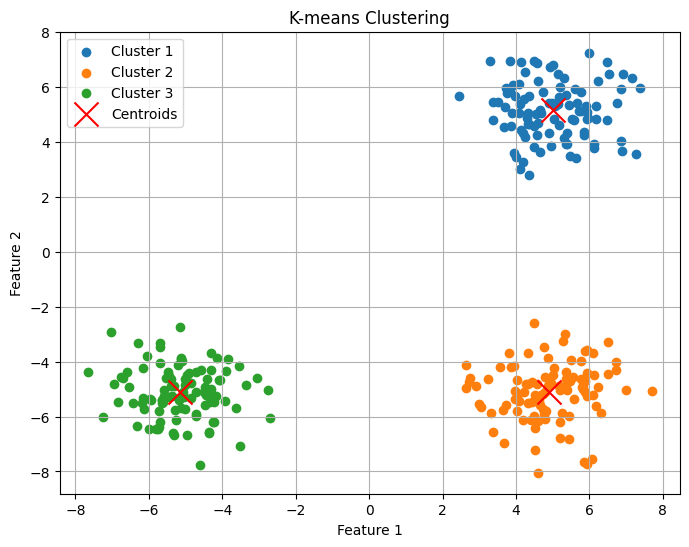

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to initialize centroids randomly
def initialize_centroids(data, k):
    # Randomly choose k unique data points as initial centroids
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

# Function to assign each data point to the nearest centroid
def assign_clusters(data, centroids):
    # Calculate the distance between each data point and each centroid
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    # Assign each data point to the closest centroid
    return np.argmin(distances, axis=1)

# Function to update centroids based on current cluster assignments
def update_centroids(data, clusters, k):
    new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

# K-means clustering algorithm
def kmeans(data, k, max_iters=100):
    # Initialize centroids
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        # Assign clusters
        clusters = assign_clusters(data, centroids)
        # Update centroids
        new_centroids = update_centroids(data, clusters, k)
        # Check for convergence (if centroids don't change)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

# Create sample data
np.random.seed(0)  # For reproducibility
data = np.vstack([
    np.random.randn(100, 2) + np.array([5, 5]),  # Cluster 1
    np.random.randn(100, 2) + np.array([-5, -5]),  # Cluster 2
    np.random.randn(100, 2) + np.array([5, -5])   # Cluster 3
])

# Number of clusters
k = 3

# Perform K-means clustering
centroids, clusters = kmeans(data, k)

# Visualize the results
plt.figure(figsize=(8, 6))

# Plot data points with cluster colors
for i in range(k):
    plt.scatter(data[clusters == i][:, 0], data[clusters == i][:, 1], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x', label='Centroids')

# Add titles and labels
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

# Show plot
plt.show()
